In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

In [47]:
iris = load_iris()

x = iris.data
y = iris.target
names = list (iris.target_names)

print(f'x contient { x.shape[0]} exmples et {x.shape[1]} variables')
print(f'il ya {np.unique(y).size} classe')
print(names)

x contient 150 exmples et 4 variables
il ya 3 classe
['setosa', 'versicolor', 'virginica']


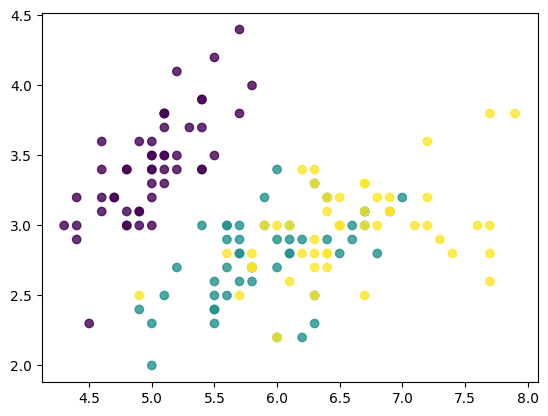

In [48]:
plt.scatter(x[:,0], x[:,1], c=y, alpha = 0.8)
plt.show()

In [49]:
x.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [50]:
from sklearn.feature_selection import VarianceThreshold #importation de l'outil necessaire pour selectionner nos variance
selector = VarianceThreshold( threshold= 0.5) 
# la variable selector est notre transformeur, on selectionne uniquement les variables avec une variance minimum de 1
x= selector.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
print('Test set:', x_train.shape)
print('Train set:', x_test.shape)

Test set: (120, 3)
Train set: (30, 3)


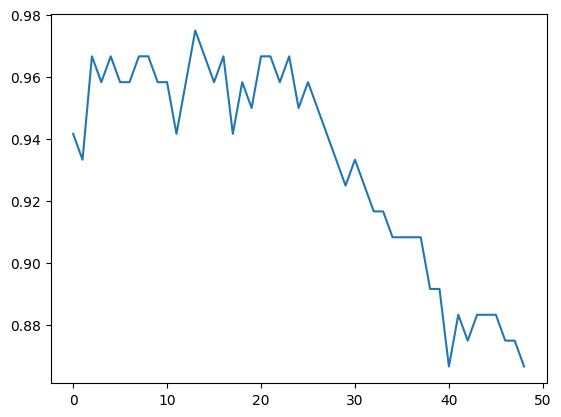

In [80]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
val_score = []
for k in range (1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=20).mean()
    val_score.append(score)
plt.plot(val_score);

In [53]:

model = KNeighborsClassifier(n_neighbors=11) # un voisin de 1 permets une precision de 100% sur l'entrainement
model.fit(x_train, y_train ) 
print('Train score:', model.score(x_train, y_train))
print('Test score:', model.score(x_test, y_test))

Train score: 0.9833333333333333
Test score: 0.9


In [54]:
cross_val_score(KNeighborsClassifier(), x_train, y_train, cv=10, scoring='accuracy')

array([1.        , 0.91666667, 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 0.91666667, 1.        , 1.        ])

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
print('Test set:', x_train.shape)
print('Train set:', x_test.shape)

Test set: (120, 3)
Train set: (30, 3)


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test_scale = scaler.transform(x_test)
x_test_scale = pd.DataFrame(x_test_scale)

In [69]:
x_train.head()

,0,1,2
0,0.528876,1.261374,1.664491
1,0.993822,0.700763,0.636234
2,2.156187,1.653801,1.021830
3,0.993822,1.093191,1.664491
4,0.761349,1.149252,1.278895


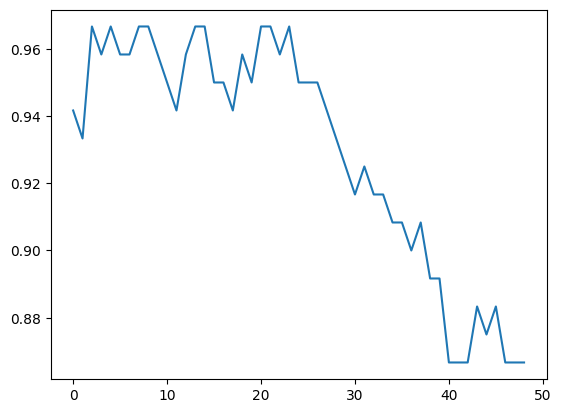

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score
val_score = []
for k in range (1,50):
    score = cross_val_score(KNeighborsClassifier(k), x_train, y_train, cv=20).mean()
    val_score.append(score)
plt.plot(val_score);

In [75]:
model = KNeighborsClassifier(n_neighbors=1) # un voisin de 1 permets une precision de 100% sur l'entrainement
model.fit(x_train, y_train) 
print('Train score:', model.score(x_train, y_train))
#print('Test score:', model.score(x_test_scale, y_test))

Train score: 1.0
Test score: 0.9666666666666667


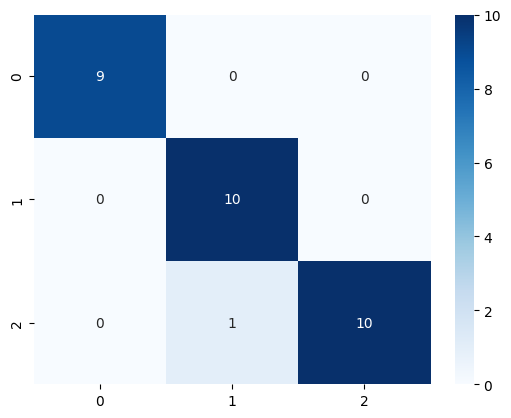

In [76]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, model.predict(x_test_scale))

sns.heatmap(cf_matrix, annot=True, cmap='Blues');